In [1]:
# 读取excel文件
import pandas as pd
df = pd.read_excel('data3.xlsx')
df.head()

,pH,温度,吸附量,ROX率,As(v)率,ROX吸附量,As吸附量
0,3,15,0.2,77.56,92.49000,40.38070,4.93
1,5,15,0.2,77.23,91.56510,40.10000,5.10
2,6,15,0.2,77.05,89.43783,39.85539,4.90
3,7,15,0.2,34.89,92.41000,16.92220,4.88
4,9,15,0.2,26.17,88.88289,14.23550,4.95


## 数据转换
首先观察原生数据，我们发现读进pandas中数据的格式和匹配度不对劲，
为了更好对数据进行运算，需要将数据格式进行转换。
我们将原有的按照吸附量、温度和PH分组的数据形式展开

In [8]:
# 先提取出pH，温度，吸附量，ROX率
data1 = df[['pH', '温度', '吸附量','ROX率']]
data1.head()

,pH,温度,吸附量,ROX率
0,3,15,0.2,77.56
1,5,15,0.2,77.23
2,6,15,0.2,77.05
3,7,15,0.2,34.89
4,9,15,0.2,26.17


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


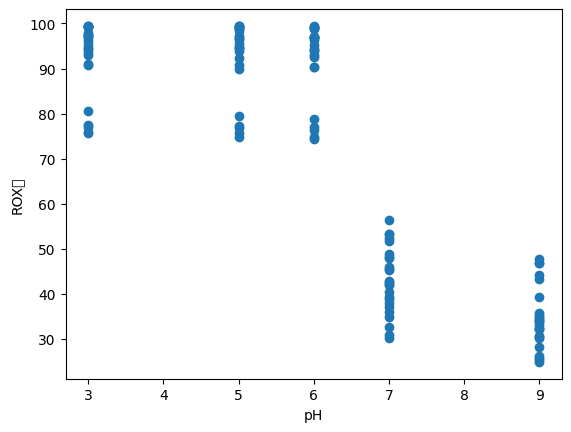

In [9]:
# 可视化上面数据，查看数据分布
import matplotlib.pyplot as plt
plt.scatter(data1['pH'], data1['ROX率'])
plt.show()


In [14]:
# 将数据分为训练集和验证集
from sklearn.model_selection import train_test_split
X = data1[['pH', '温度', '吸附量']]
y = data1['ROX率']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 假设的回归方程 Q（去除率）=aX（温度）+bY（剂量）+cZ（pH值）
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('回归系数：', model.coef_)
print('截距：', model.intercept_)
print('训练集的R方：', model.score(X_train, y_train))
print('验证集的R方：', model.score(X_test, y_test))
# 线性模型，查看结果好不好
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print('均方误差：', mean_squared_error(y_test, y_pred))
print('R方：', r2_score(y_test, y_pred))

# =

回归系数： [-10.9287345    0.04364515  16.44051806]
截距： 124.65937990459125
训练集的R方： 0.7122139358318883
验证集的R方： 0.6112109622908845
均方误差： 292.69548541657196
R方： 0.6112109622908845


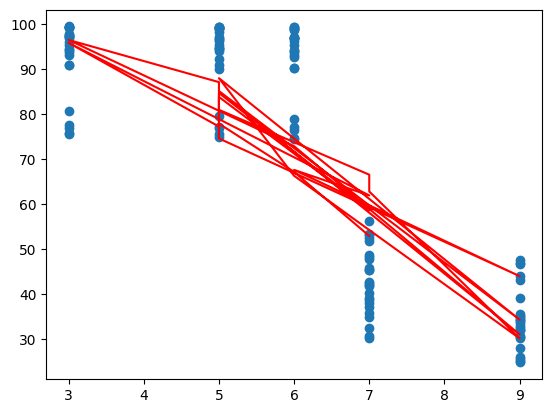

In [15]:
# 将数据和拟合的线绘画出来
import matplotlib.pyplot as plt
plt.scatter(data1['pH'], data1['ROX率'])
plt.plot(X_test['pH'], y_pred, color='red')
plt.show()


In [19]:
X = data1[['pH', '温度', '吸附量']]
y = data1['ROX率']
# 机器学习，获取，线性回归效果差，使用三元多次方程来做
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
print('回归系数：', model.coef_)
print('截距：', model.intercept_)
print('训练集的R方：', model.score(X_poly, y))
print('验证集的R方：', model.score(X_poly, y))
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_poly)
print('均方误差：', mean_squared_error(y, y_pred))
print('R方：', r2_score(y, y_pred))


# ... 上面的代码省略 ...

# 获取模型系数
coefficients = model.coef_
intercept = model.intercept_

# 打印方程
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    # 根据多项式的顺序，确定特征名称
    feature_name = poly.get_feature_names_out(input_features=['pH', '温度', '吸附量'])[i]
    equation += f" + {coef:.2f}{feature_name}"

print(equation)

# 绘画出上面式子的图像


回归系数： [-2.63744465e+07 -1.82328490e+03  1.77162001e+01  6.06857827e+02
  5.16718009e+02 -1.83819850e-01  9.10928623e+01 -9.11972735e-01
 -4.26923201e+00 -1.80009129e+03 -6.19203008e+01  1.09439293e-02
 -1.02651421e+01  1.93319047e-03  2.54182777e-01 -7.68476479e+01
  2.00266250e-02  8.04278523e-02  2.73967335e+00  2.12222368e+03
  2.64510839e+00 -6.16043412e-04  5.30712254e-01 -1.21128949e-05
  6.41387921e-03 -3.04939517e-01 -7.40272633e-06 -2.36555208e-03
 -1.53892353e-01  5.01322770e+01 -1.57076149e-04 -5.46861366e-04
 -2.50052631e-02 -2.97587049e-01 -9.18492073e+02]
截距： 26376597.225739703
训练集的R方： 0.9943852164651481
验证集的R方： 0.9943852164651481
均方误差： 4.245952623446026
R方： 0.9943852164651481
y = 26376597.23 + -26374446.461 + -1823.28pH + 17.72温度 + 606.86吸附量 + 516.72pH^2 + -0.18pH 温度 + 91.09pH 吸附量 + -0.91温度^2 + -4.27温度 吸附量 + -1800.09吸附量^2 + -61.92pH^3 + 0.01pH^2 温度 + -10.27pH^2 吸附量 + 0.00pH 温度^2 + 0.25pH 温度 吸附量 + -76.85pH 吸附量^2 + 0.02温度^3 + 0.08温度^2 吸附量 + 2.74温度 吸附量^2 + 2122.22吸附量^3 + 2.

In [20]:
import statsmodels.api as sm

# 添加常数项以便计算截距
X_sm = sm.add_constant(X_poly)

# 训练模型
model_sm = sm.OLS(y, X_sm).fit()

# 打印模型摘要，包含标准化回归系数和t-统计量
print(model_sm.summary())

# 获取标准化回归系数
beta_coeffs = model_sm.params[1:]  # 排除第一个截距项


                            OLS Regression Results                            
Dep. Variable:                   ROX率   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     479.7
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           3.48e-88
Time:                        19:34:43   Log-Likelihood:                -266.31
No. Observations:                 125   AIC:                             602.6
Df Residuals:                      90   BIC:                             701.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2152.9828    104.828     20.538      0.0

In [9]:
# 读取excel文件
import pandas as pd
df = pd.read_excel('data3.xlsx')
df.head()
df.shape[0]

# 先提取出pH，温度，吸附量，ROX率
data1 = df[['pH', '温度', '吸附量','As(v)率']]
data1.head()

# 将数据分为训练集和验证集
from sklearn.model_selection import train_test_split
X = data1[['pH', '温度', '吸附量']]
y = data1['As(v)率']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 假设的回归方程 Q（去除率）=aX（温度）+bY（剂量）+cZ（p

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('回归系数：', model.coef_)
print('截距：', model.intercept_)
print('训练集的R方：', model.score(X_train, y_train))
print('验证集的R方：', model.score(X_test, y_test))
# 线性模型，查看结果好不好
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print('均方误差：', mean_squared_error(y_test, y_pred))
print('R方：', r2_score(y_test, y_pred))

#
# X = data1[['pH', '温度', '吸附量']]
# y = data1['As(v)率']
# # 机器学习，获取，线性回归效果差，使用三元多次方程来做
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=5)
# X_poly = poly.fit_transform(X)
# model = LinearRegression()
# model.fit(X_poly, y)
# print('回归系数：', model.coef_)
# print('截距：', model.intercept_)
# print('训练集的R方：', model.score(X_poly, y))
# print('验证集的R方：', model.score(X_poly, y))
# from sklearn.metrics import mean_squared_error, r2_score
# y_pred = model.predict(X_poly)
# print('均方误差：', mean_squared_error(y, y_pred))
# print('R方：', r2_score(y, y_pred))


# ... 上面的代码省略 ...

# 获取模型系数
coefficients = model.coef_
intercept = model.intercept_

# 打印方程
equation = f"y = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    # 根据多项式的顺序，确定特征名称
    feature_name = poly.get_feature_names_out(input_features=['pH', '温度', '吸附量'])[i]
    equation += f" + {coef:.2f}{feature_name}"

print(equation)

# 绘画出上面式子的图像

回归系数： [-0.51959305  0.05004806 -0.33979395]
截距： 96.14712175511178
训练集的R方： 0.17964928689951354
验证集的R方： 0.08598565968218286
均方误差： 5.987982060195765
R方： 0.08598565968218286
y = 96.15 + -0.521 + 0.05pH + -0.34温度


In [21]:
import pandas as pd
df = pd.read_excel('data3.xlsx')
df.head()
df.shape[0]

# 先提取出pH，温度，吸附量，ROX率
data1 = df[['pH', '温度', '吸附量','As(v)率']]
data1.head()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 假设df是你的DataFrame
# data1 = df[['pH', '温度', '吸附量','As(v)率']]

# 数据分割
X = data1[['pH', '温度', '吸附量']]
y = data1['As(v)率']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归器实例
rf_regressor = RandomForestRegressor(n_estimators=60, random_state=42)

# 拟合模型
rf_regressor.fit(X_train, y_train)

# 预测
y_pred = rf_regressor.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出结果
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# 特征重要性
importances = rf_regressor.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')



Mean Squared Error (MSE): 0.48023617083867093
R^2 Score: 0.9266960484394785
pH: 0.33419891279119995
温度: 0.06670697976240543
吸附量: 0.5990941074463947


In [3]:
import pandas as pd
df = pd.read_excel('data3.xlsx')
df.head()
df.shape[0]

# 先提取出pH，温度，吸附量，ROX率
data1 = df[['pH', '温度', '吸附量','As(v)率']]
data1.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 假设df是你的DataFrame
# data1 = df[['pH', '温度', '吸附量','As(v)率']]

# 数据分割
X = data1[['pH', '温度', '吸附量']]
y = data1['As(v)率']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用GBRT来拟合模型
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=60, random_state=42)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print('均方误差：', mean_squared_error(y_test, y_pred))
print('R方：', r2_score(y_test, y_pred))

# 特征重要性
importances = gbrt.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

均方误差： 0.18124626336729255
R方： 0.9723343052498542
pH: 0.34106734240228653
温度: 0.040348966826928526
吸附量: 0.6185836907707849


In [6]:
# 画出rsm响应曲面设计
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_excel('data3.xlsx')
df.head()
df.shape[0]
data1 = df[['pH', '温度', '吸附量','As(v)率']]
X = data1[['pH', '温度', '吸附量']]
y = data1['As(v)率']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=60, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# 为ph和AS绘制rsm曲线



Mean Squared Error (MSE): 0.48023617083867093
R^2 Score: 0.9266960484394785


In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设data1已经是DataFrame格式，包含了'pH', '温度', '吸附量', 'As(v)率'列

# 创建设计矩阵，包括主效应、交互项和二次项
X = data1[['pH', '温度', '吸附量']]
X = sm.add_constant(X)
X['pH^2'] = X['pH']**2
X['温度^2'] = X['温度']**2
X['吸附量^2'] = X['吸附量']**2
X['pH*温度'] = X['pH']*X['温度']
X['pH*吸附量'] = X['pH']*X['吸附量']
X['温度*吸附量'] = X['温度']*X['吸附量']

# 拟合模型
model = sm.OLS(y, X).fit()

# 预测曲面
pH_range = np.linspace(X['pH'].min(), X['pH'].max(), 50)
温度_range = np.linspace(X['温度'].min(), X['温度'].max(), 50)
吸附量_range = np.linspace(X['吸附量'].min(), X['吸附量'].max(), 50)

pH_grid, 温度_grid = np.meshgrid(pH_range, 温度_range)
吸附量_grid = np.full(pH_grid.shape, 吸附量_range.mean()) # 可以选择吸附量的任意值或创建网格

X_pred = pd.DataFrame({
    'pH': pH_grid.flatten(),
    '温度': 温度_grid.flatten(),
    '吸附量': 吸附量_grid.flatten()
})

X_pred['pH^2'] = X_pred['pH']**2
X_pred['温度^2'] = X_pred['温度']**2
X_pred['吸附量^2'] = X_pred['吸附量']**2
X_pred['pH*温度'] = X_pred['pH']*X_pred['温度']
X_pred['pH*吸附量'] = X_pred['pH']*X_pred['吸附量']
X_pred['温度*吸附量'] = X_pred['温度']*X_pred['吸附量']

y_pred = model.predict(sm.add_constant(X_pred))

# 绘制曲面图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(pH_grid, 温度_grid, y_pred.reshape(pH_grid.shape), cmap='viridis')

ax.set_xlabel('pH')
ax.set_ylabel('温度')
ax.set_zlabel('As(v)率')

plt.show()


ValueError: shapes (2500,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设data1已经定义好了
# data1 = ...
df = pd.read_excel('data3.xlsx')
df.head()
df.shape[0]
data1 = df[['pH', '温度', '吸附量','As(v)率']]
# 创建设计矩阵，包括主效应、交互项和二次项
X = data1[['pH', '温度', '吸附量']]
X = sm.add_constant(X)
X['pH^2'] = X['pH']**2
X['温度^2'] = X['温度']**2
X['吸附量^2'] = X['吸附量']**2
X['pH*温度'] = X['pH']*X['温度']
X['pH*吸附量'] = X['pH']*X['吸附量']
X['温度*吸附量'] = X['温度']*X['吸附量']

X.head()
# # 定义响应变量
y = data1['As(v)率']
#
# # 拟合模型
model = sm.OLS(y, X).fit()
#
# # 预测曲面
pH_range = np.linspace(X['pH'].min(), X['pH'].max(), 50)
温度_range = np.linspace(X['温度'].min(), X['温度'].max(), 50)
吸附量_range = np.linspace(X['吸附量'].min(), X['吸附量'].max(), 50)
#
# # 创建网格
pH_grid, 温度_grid = np.meshgrid(pH_range, 温度_range)
吸附量_grid = np.full(pH_grid.shape, 吸附量_range.mean())

# # 将网格点转换为预测所需的格式
X_pred = pd.DataFrame({
    'pH': pH_grid.flatten(),
    '温度': 温度_grid.flatten(),
    '吸附量': 吸附量_grid.flatten()
})
#
# # 确保X_pred有和X一样的列
X_pred = X_pred[X.columns[1:]]
X_pred = sm.add_constant(X_pred)
#
# # 添加二次项和交互项
# # X_pred['pH^2'] = X_pred['pH']**2
# # X_pred['温度^2'] = X_pred['温度']**2
# # X_pred['吸附量^2'] = X_pred['吸附量']**2
# # X_pred['pH*温度'] = X_pred['pH']*X_pred['温度']
# # X_pred['pH*吸附量'] = X_pred['pH']*X_pred['吸附量']
# # X_pred['温度*吸附量'] = X_pred['温度']*X_pred['吸附量']
#
# # 预测响应值
# y_pred = model.predict(X_pred)
#
# # 绘制曲面图
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
#
# # 重塑预测结果以适应绘图
# y_pred_reshaped = y_pred.values.reshape(pH_grid.shape)
#
# surf = ax.plot_surface(pH_grid, 温度_grid, y_pred_reshaped, cmap='viridis')
#
# ax.set_xlabel('pH')
# ax.set_ylabel('温度')
# ax.set_zlabel('As(v)率')
#
# plt.show()


KeyError: "['pH^2', '温度^2', '吸附量^2', 'pH*温度', 'pH*吸附量', '温度*吸附量'] not in index"

In [3]:
from skopt import gp_minimize
from skopt.space import Real, Integer
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# 读取Excel文件并准备数据
file_path = 'data3.xlsx'
df = pd.read_excel(file_path)

# 假设我们的目标是最大化ROX去除率，这里我们使用吸附剂用量为0.2的数据进行模型训练
data = df[df['吸附剂用量'] == 0.2]
X = data[['温度', 'pH', '吸附剂用量']].values
y = -data['ROX率'].values  # 使用负号因为我们想最大化去除率，而gp_minimize是最小化函数

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 定义目标函数
def target_function(params):
    temperature, ph, adsorbent_amount = params
    input_data = pd.DataFrame({
        '温度': [temperature],
        'pH': [ph],
        '吸附剂用量': [adsorbent_amount]
    })
    return -rf.predict(input_data)[0]

# 定义参数范围
space = [
    Integer(15, 45, name='temperature'),  # 温度范围
    Integer(3, 9, name='ph'),             # pH范围
    Real(0.2, 1.0, name='adsorbent_amount')  # 吸附剂用量范围
]

# 进行贝叶斯优化，增加实验迭代
result = gp_minimize(
    func=target_function,
    dimensions=space,
    n_calls=100,  # 增加实验迭代
    random_state=42,
    noise=0.1  # 假设模型预测有一定的噪声
)

# 输出最优参数组合
new_experiments = result.x_iters

# 打印新的实验点
print('新的实验点:')
for i, params in enumerate(new_experiments, 1):
    print(f"实验点 {i}: 温度={params[0]}, pH={params[1]}, 吸附剂用量(g/L)={params[2]}")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [45, 9, 0.2] before, using random point [29, 6, 0.4114751828189163]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [45, 9, 0.2] before, using random point [32, 7, 0.6752056798982147]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [45, 9, 0.2] before, using random point [36, 6, 0.5572146450898631]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [45, 9, 0.2] before, using random point [17, 5, 0.928

新的实验点:
实验点 1: 温度=39, pH=4, 吸附剂用量(g/L)=0.8237528002182157
实验点 2: 温度=33, pH=6, 吸附剂用量(g/L)=0.27997993265440235
实验点 3: 温度=29, pH=5, 吸附剂用量(g/L)=0.3142934543375527
实验点 4: 温度=35, pH=3, 吸附剂用量(g/L)=0.77759901781346
实验点 5: 温度=43, pH=3, 吸附剂用量(g/L)=0.9937692474329742
实验点 6: 温度=34, pH=7, 吸附剂用量(g/L)=0.20565304417577393
实验点 7: 温度=16, pH=6, 吸附剂用量(g/L)=0.5198887773722045
实验点 8: 温度=16, pH=9, 吸附剂用量(g/L)=0.38621707234424346
实验点 9: 温度=18, pH=7, 吸附剂用量(g/L)=0.5059695930137302
实验点 10: 温度=44, pH=6, 吸附剂用量(g/L)=0.8879523253890567
实验点 11: 温度=45, pH=8, 吸附剂用量(g/L)=0.2
实验点 12: 温度=15, pH=9, 吸附剂用量(g/L)=0.7765998495085074
实验点 13: 温度=15, pH=9, 吸附剂用量(g/L)=0.8919232953717167
实验点 14: 温度=15, pH=9, 吸附剂用量(g/L)=0.8472780307433765
实验点 15: 温度=15, pH=9, 吸附剂用量(g/L)=0.854021211132993
实验点 16: 温度=15, pH=9, 吸附剂用量(g/L)=0.9115528645533497
实验点 17: 温度=15, pH=9, 吸附剂用量(g/L)=0.9661283798433409
实验点 18: 温度=15, pH=9, 吸附剂用量(g/L)=0.9593692934777216
实验点 19: 温度=15, pH=9, 吸附剂用量(g/L)=0.9722012831249323
实验点 20: 温度=15, pH=9, 吸附剂用量(g/L)=1.0
实验点 21: 温度=1

In [14]:
from skopt import gp_minimize
from skopt.space import Real, Integer
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# 读取Excel文件并准备数据
file_path = 'data3.xlsx'
df = pd.read_excel(file_path)

# 假设我们的目标是最大化ROX去除率，这里我们使用吸附剂用量为0.2的数据进行模型训练
data = df[df['吸附剂用量'] == 0.2]
X = data[['温度', 'pH', '吸附剂用量']].values
y = -data['ROX率'].values  # 使用负号因为我们想最大化去除率，而gp_minimize是最小化函数

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# 定义目标函数，现在我们直接返回预测的吸附量，而不是取负值
def target_function(params):
    temperature, ph, adsorbent_amount = params
    input_data = pd.DataFrame({
        '温度': [temperature],
        'pH': [ph],
        '吸附剂用量': [adsorbent_amount]
    })
    # 假设 rf.predict 返回的是吸附量，我们直接返回预测值
    return rf.predict(input_data)[0]

# 定义参数范围
space = [
    Integer(15, 45, name='temperature'),  # 温度范围
    Integer(3, 9, name='ph'),             # pH范围
    Real(0.2, 1.0, name='adsorbent_amount')  # 吸附剂用量范围
]

# 使用贝叶斯优化找到单一的最优特征组合以最大化总吸附量
# n_calls 可以设置为一个较大的值，比如50或100
optimal_result = gp_minimize(
    func=target_function,
    dimensions=space,
    n_calls=60,  # 增加迭代次数以提高找到全局最优解的概率
    random_state=42,
    noise=0.1  # 假设模型预测有一定的噪声
)

# 输出最优参数组合
print("最优特征组合:")
print(f"温度: {optimal_result.x[0]}, pH: {optimal_result.x[1]}, 吸附剂用量(g/L): {optimal_result.x[2]}")
print(f"预测的最大总吸附量: {optimal_result.fun}")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [45, 6, 1.0] before, using random point [19, 4, 0.6833307225732681]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [45, 6, 1.0] before, using random point [32, 5, 0.9684388597900713]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 3, 0.2] before, using random point [39, 3, 0.8706301503658216]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 3, 0.2] before, using random point [23, 3, 0.507

最优特征组合:
温度: 43, pH: 3, 吸附剂用量(g/L): 0.9937692474329742
预测的最大总吸附量: -80.0655000000001


In [18]:
from skopt import gp_minimize
from skopt.space import Real, Integer
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# 读取Excel文件并准备数据
file_path = 'data3.xlsx'
df = pd.read_excel(file_path)

# 假设我们的目标是最大化ROX去除率，这里我们使用吸附剂用量为0.2的数据进行模型训练
data = df[df['吸附剂用量'] == 0.2]
X = data[['温度', 'pH', '吸附剂用量']].values
y = data['总吸附量'].values  # 不需要使用负号，因为我们想直接预测去除率

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林回归模型
rf = RandomForestRegressor(n_estimators=400, random_state=42)
rf.fit(X_train, y_train)

# 评估模型
print("训练集上的评估结果:")
print(rf.score(X_train, y_train))
print("测试集上的评估结果:")
print(rf.score(X_test, y_test))


# 定义目标函数
def target_function(params):
    temperature, ph, adsorbent_amount = params
    input_data = pd.DataFrame({
        '温度': [temperature],
        'pH': [ph],
        '吸附剂用量': [adsorbent_amount]
    })
    return -rf.predict(input_data)[0]  # 返回负值，因为我们要最小化

# 定义参数范围
space = [
    Integer(15, 45, name='温度'),  # 温度范围
    Integer(3, 9, name='pH'),     # pH范围
    Real(0.2, 1.0, name='吸附剂用量')  # 吸附剂用量范围
]
# print(target_function(space))
# # 使用贝叶斯优化找到单一的最优特征组合以最大化总吸附量
optimal_result = gp_minimize(
    func=target_function,
    dimensions=space,
    n_calls=200,  # 增加迭代次数以提高找到全局最优解的概率
    random_state=42,
    noise=0.1  # 假设模型预测有一定的噪声
)

# 输出最优参数组合
print("最优特征组合:")
print(f"温度: {optimal_result.x[0]}, pH: {optimal_result.x[1]}, 吸附剂用量(g/L): {optimal_result.x[2]}")
print(f"预测的最大总吸附量: {-optimal_result.fun}")  # 记得取负号，恢复到原始值


训练集上的评估结果:
0.998772080027452
测试集上的评估结果:
0.988157260736936


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 5, 0.2] before, using random point [26, 7, 0.8684935497809176]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 5, 0.2] before, using random point [18, 4, 0.5577411379955044]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 4, 0.2] before, using random point [17, 5, 0.9895682152349621]
  warnings.warn(
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [15, 4, 0.2] before, using random point [28, 6, 0.500

最优特征组合:
温度: 15, pH: 4, 吸附剂用量(g/L): 0.2
预测的最大总吸附量: 45.06775185000012
